In [1]:
USER_API_KEY = "SWt9OtcNKRv9RTetLoGPg9MsmQco0o66"

In [2]:
import numpy as np  
from pymatgen.ext.matproj import MPRester
from pymatgen.apps.borg.hive import VaspToComputedEntryDrone
from pymatgen.apps.borg.queen import BorgQueen
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

drone = VaspToComputedEntryDrone()
queen = BorgQueen(drone, rootpath=".")
entries = queen.get_data()

In [3]:
with MPRester(USER_API_KEY) as mpr:
    mp_entries = mpr.get_entries_in_chemsys(['Li', 'Fe', 'O'])  



C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\paramiko\pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\paramiko\transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
c:\Users\Administrator\.conda\envs\pymatgen\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving ThermoDoc documents: 100%|██████████| 378/378 [00:00<?, ?it/s]


In [4]:
entries.extend(mp_entries)
compat = MaterialsProjectCompatibility()
entries = compat.process_entries(entries)

pd = PhaseDiagram(entries)
plotter = PDPlotter(pd)
plotter.show()

Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


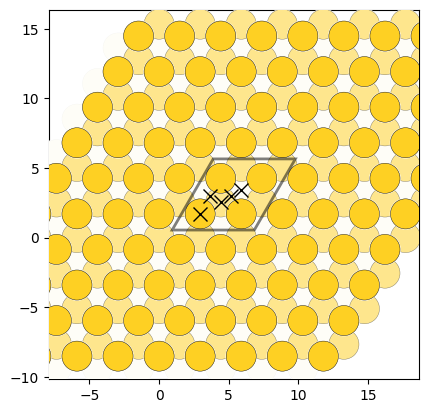

In [14]:
from pymatgen.analysis.adsorption import  *
from pymatgen.core.surface import Slab, SlabGenerator, generate_all_slabs
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.structure import Structure
from pymatgen.ext.matproj import MPRester
from matplotlib import pyplot as plt
from pymatgen.io.vasp.inputs import Poscar

with MPRester(USER_API_KEY) as m:
    mp_id = "mp-81"
    struct = m.get_structure_by_material_id("mp-81")
    struct = SpacegroupAnalyzer(struct).get_conventional_standard_structure()
    slab = SlabGenerator(struct, (1,1,1), min_slab_size=8.0, min_vacuum_size=15.0, center_slab=True)

    for n, slabs in enumerate(slab.get_slabs()):
        slabs_bak = slabs.copy()
        slabs.make_supercell([[2,0,0],[0,2,0],[0,0,1]])

        fig = plt.figure()
        ax = fig.add_subplot(111)
        plot_slab(slabs, ax, adsorption_sites=True)

        plt.savefig(str(n) + '-Au-111.png', dpi=300)
        open('POSCAR' + mp_id + '-' + str(n), 'w').write(Poscar(slabs).get_string())


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


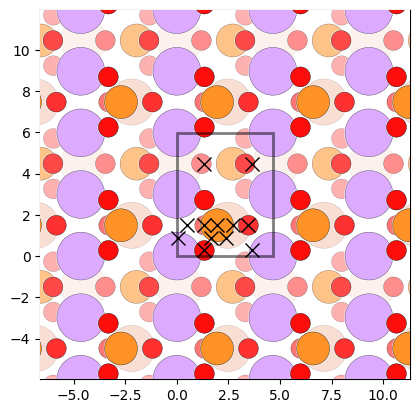

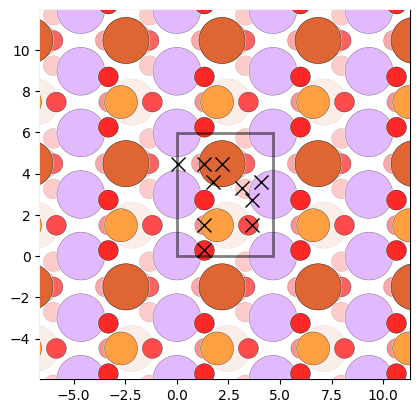

In [20]:
from pymatgen.analysis.adsorption import  *
from pymatgen.core.surface import Slab, SlabGenerator, generate_all_slabs, Structure, Lattice, ReconstructionGenerator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.structure import Structure
from pymatgen.ext.matproj import MPRester
from matplotlib import pyplot as plt
from pymatgen.io.vasp.inputs import Poscar

# get the materials id
mp_id = "mp-19017"
# get structure by MP
struct = mpr.get_structure_by_material_id(mp_id)
# SpacegroupAnalyzer get conventional_standard_structure
struct = SpacegroupAnalyzer(struct).get_conventional_standard_structure()
# SlabGenerator(structure, miler_index, slab_size, vacuum_size)
slab = SlabGenerator(struct,(0, 0, 1), min_slab_size=8.0, min_vacuum_size=15.0, center_slab=True)

# slab.get_slabs() 遍历slab每一层 ； bonds = {('P','O'):3} 限制条件：P-O键3埃以内不取该层
for n, slabs in enumerate(slab.get_slabs(bonds = {('P','O'):3})):
    slabs.make_supercell([[1,0,0],[0,1,0],[0,0,1]])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plot_slab(slabs, ax, adsorption_sites=True)